# Introduction to Neural Networks

The performance of many simple machine learning algorithms depends heavily on the representation of the data they are given. This kind of learning is called representation learning. For e.g. when logistic regression is used to recommend c-section delivery, the AI system doesn't examine the patient directly. Instead, the doctor tells the system several pieces of relevant information. Each piece of information included in the representation of the patient is know n as a feature. 

A major source of difficulty in many real-world artificial intelligence applications is that many of the factors of variation influence every single piece of data we are able to observe. For e.g. individual pixels in an image of a red car might be very close to back at night. Most apps require us to disentangle the factors of variation and discard the ones that we don't care about. It can be very diificult to extract such high-level, abstract features from raw data. When it is nearly difficult to obtain a representation to solve the problem, representation learning may not help us. This is where Deep Learning help and solves the central problem in representation learning. 

Deep Learning introduces representations that are expressed in terms of other, simple representations. Deep Learning enables the computer to build complex concepts out of simpler concepts. For e.g. the following figure shows how a dee learning system can represent the concept of an image of a person by combining simpler concepts, such as corners and contours, which are inturn defined in terms of edges.

![Deep Learning](dl.jpg)

Some of the earliest algorithms we recognize today were intended to be computational models of bilogical learning, i.e., models of how learning happens or could happen in the brain. As a result, one of the names that deep learning gone by is Artificial Neural Networks. 

![Neuron](neuron.jpg)

An Aritifical Neuron composes:
1. Input
2. Weights
3. Computational Function (Feeds on inputs and Weights)
3. Activation Function (computes Output)
4. Output

![Artifical Neuron](neuron2.jpg)

There many types of activation functions, most common ones are:
1. Sigmoid
2. Tanh
3. ReLu


## Feedforwad Networks

Feedforward Neural networks, also called as multilayer perceptrons (MLPs) are one type of deep learning model. The goal of feedforward network is to approximate some function *f*.  For e.g. for a classifier a feedforward network defines a mapping **y** = f(x;W) and learns the value of the parameters W that results in the best function approximation. 

These models are ca;;ed feedforward because inflormations flows through the function being evaluated from x, through the intermediate computations used to define f, and finally to the output y. There are no feedback connections in which outputs of the model are back into itself. When feedforward neural networks are extended to include feedback connections, they are called recurrent neural networks.  

Feedforward neural networks are simply called as networks because they are typically represented by composing together many different functions. 
![FeedForward Neural Network](network.jpg)

## Train a Network

- Choose Hyperparamaters
- Choose Network Design
- Form a Neural Network
- Compute an estimate value for all samples
- Compute Loss
- Reduce Loss
- Repeate Last 3 Steps.

## Errors and Loss function

- In most learning networks, error is calculated as the difference between the actual output and the predicted output.
- The function that is used to compute this error is known as Loss Function.
- Different loss functions will give different errors for the same prediction, and thus have a considerable effect on the performance of the model.
- One of the most widely used loss function is mean square error, which calculates the square of difference between actual value and predicted value.
- Different loss functions are used to deal with different type of tasks, i.e. regression and classification.

## Optimization

The goal of optimization is to find a set of weights that minimizes the loss function. Optimisation functions usually calculate the gradient i.e. the partial derivative of loss function with respect to weights, and the weights are modified in the opposite direction of the calculated gradient. This cycle is repeated until we reach the minima of loss function.

![Gradient](gradient.jpg)

The procedure of repeatedly evaluating the gradient and then performing a parameter update is called **Gradient Descent**. Backpropagation is an efficient method to do gradient descent. It saves the gradient w.r.t the upper layer output to complete the gradient w.r.t the weights immediately below

![Back Propogation](backpropogation.gif)

**Learning Rate** a positive scalar determining the size of the step in the evaluation of gradient.
- With low learning rate the improvements will be linear
- Higher learning rate can decay the loss faster, but it can get stuck
- Initially keep the learning rate higher
- Later decrease the learning rate

![Learning Rate](learning.gif)

# Simple Neural Network Implementation in Python

In [270]:
# Import Required Libraries

import numpy as np # helps with the math
import matplotlib.pyplot as plt # to plot error during training

In [271]:
# Create Data

# input data
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])

# output data
outputs = np.array([[0], [0], [0], [1], [1], [1]])

print(inputs)
print(outputs)

[[0 1 0]
 [0 1 1]
 [0 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 1]]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [272]:
# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

In [273]:
# create neural network   
NN = NeuralNetwork(inputs, outputs)
NN

In [274]:
NN.weights

array([[0.5],
       [0.5],
       [0.5]])

In [275]:
# train neural network
NN.train()

In [276]:
NN.weights

array([[10.08826006],
       [-5.39800417],
       [ 0.35438179]])

In [277]:
# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

In [278]:
# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

[[0.99089925]]  - Correct:  1
[[0.006409]]  - Correct:  0


In [279]:
# Print Error Data
NN.error_history

[0.44707092063439274,
 0.4193299336210381,
 0.3927198606267786,
 0.3682808555506827,
 0.346735432321121,
 0.3281542302587423,
 0.3122297965003958,
 0.2985527459862868,
 0.28673394361595184,
 0.2764414542228986,
 0.267404420959651,
 0.2594058174767815,
 0.2522726635789681,
 0.2458668602724242,
 0.24007756611276612,
 0.23481517146149358,
 0.23000664319028727,
 0.22559195957096967,
 0.22152138329779317,
 0.21775336921179908,
 0.21425295022464488,
 0.21099048370075899,
 0.20794067055160803,
 0.20508178180370482,
 0.20239504405157607,
 0.19986414745593306,
 0.19747484895551604,
 0.1952146500037084,
 0.19307253306143543,
 0.19103874474317672,
 0.1891046162604514,
 0.18726241388037482,
 0.18550521369191975,
 0.18382679617719302,
 0.18222155701263906,
 0.18068443124402864,
 0.17921082853989775,
 0.17779657766826598,
 0.17643787868902172,
 0.1751312616303813,
 0.1738735506382684,
 0.17266183276444516,
 0.17149343070207154,
 0.17036587889321786,
 0.16927690252727157,
 0.1682243990264715,
 0.1672

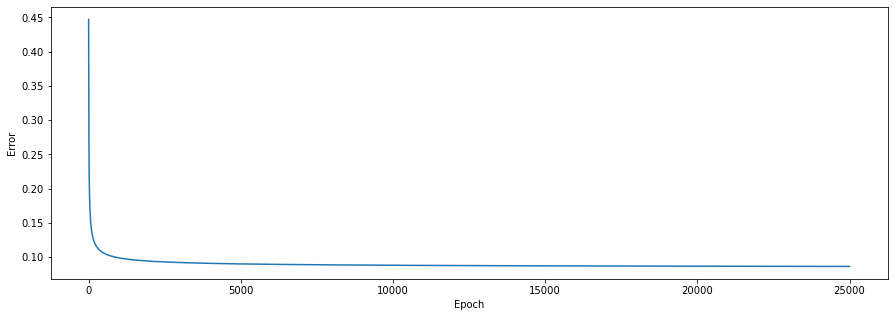

In [280]:
# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

# Tensor Flow

TensorFlow is an open-source machine learning library for research and production. TensorFlow offers APIs for beginners and experts to develop for desktop, mobile, web, and cloud.

The central unit of data in TensorFlow is the tensor. A tensor consists of a set of primitive values shaped into an array of any number of dimensions. A tensor's rank is its number of dimensions, while its shape is a tuple of integers specifying the array's length along each dimension. 

A computational graph is a series of TensorFlow operations arranged into a graph. The graph is composed of two types of objects.
* tf.Operation (or "ops"): The nodes of the graph. Operations describe calculations that consume and produce tensors.
* tf.Tensor: The edges in the graph. These represent the values that will flow through the graph. Most TensorFlow functions return tf.Tensors.

Let's build a simple computational graph. The most basic operation is a constant. The Python function that builds the operation takes a tensor value as input. The resulting operation takes no inputs. When run, it outputs the value that was passed to the constructor. We can create two floating point constants a and b as follows:


In [281]:
import tensorflow as tf

In [282]:
a = tf.constant(3.0, dtype=tf.float32)
b = tf.constant(4.0) # also tf.float32 implicitly
total = tf.add(a,b)
print(a)
print(b)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)


TensorFlow's current version is 2.x. The 2.0 version of Tensorflow released in Sept'18. In Tensorflow 1.x if you print total, it won't provide the output you expect. To run any operation in 1.x, it need to run this in a session. A session represents the environment in which the objects, which in our example is sum of 2 lists, are executed. Not that the value of total is never stored in python variable, the variable total here is just a reference to the Tensorflow Graph. And the session holds the values of elements in the graph. For e.g. to print total, we really need to run print(tf.Session.run(total)).

Basically in 1.x version of Tensorflow the developer needs to first create complete graph operations and only then these operations compiled with a TensorFlow session object and fed data. For a normal python programmer, this is difficult to understand and debug. Tensorflow 2.x made things simpler and more Pythonic.

Tensorflow 2.x makes Eager Execution by default. Eager Execution will calculate the values of tensors as they occur in your code.

Note: TensorFlow's eager execution is an imperative programming environment that evaluates operations immediately, without building graphs: operations return concrete values instead of constructing a computational graph to run later. This makes it easy to get started with TensorFlow and debug models, and it reduces boilerplate as well.

In [283]:
tf.executing_eagerly()

True

In [284]:
print(total)

tf.Tensor(7.0, shape=(), dtype=float32)


In [285]:
a = tf.constant([[1, 2],
                 [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [286]:
# Broadcasting support
b = tf.add(a, 1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [287]:
# Operator overloading is supported
print(a * b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [288]:
# Use NumPy values
import numpy as np

c = np.multiply(a, b)
print(c)

[[ 2  6]
 [12 20]]


In [289]:
# Obtain numpy value from a tensor:
print(a.numpy())
# => [[1 2]
#     [3 4]]

[[1 2]
 [3 4]]


# Keras

Keras is a high-level API to build and train deep learning models. It's used for fast prototyping, advanced research, and production, with three key advantages:
- User friendly
    - Keras has a simple, consistent interface optimized for common use cases. It provides clear and actionable feedback for user errors.
- Modular and composable
    - Keras models are made by connecting configurable building blocks together, with few restrictions.
- Easy to extend
    - Write custom building blocks to express new ideas for research. Create new layers, loss functions, and develop state-of-the-art models.

Since Tensorflow 2.x keras is in-built into it.


In [290]:
import tensorflow.keras as keras

tensorflow.keras is TensorFlow's implementation of the Keras API specification. This is a high-level API to build and train models that includes first-class support for TensorFlow-specific functionality, such as eager execution, tf.data pipelines, and Estimators. tf.keras makes TensorFlow easier to use without sacrificing flexibility and performance.

In [291]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.4.1


In [292]:
# Load Sample Data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [293]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

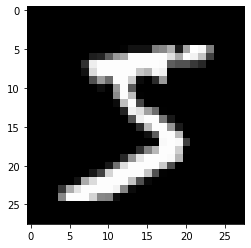

In [294]:
plt.imshow(x_train[0], cmap='gray')

In [295]:

x_train, x_test = x_train / 255.0, x_test / 255.0

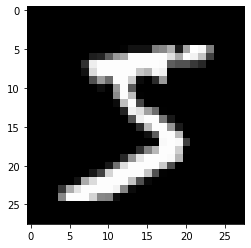

In [296]:
plt.imshow(x_train[0], cmap='gray')

In [297]:
y_train[0]

5

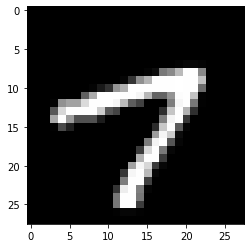

In [298]:
plt.imshow(x_train[101], cmap='gray')

In [300]:
y_train[101]

7

In [302]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [303]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [304]:
x_train[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [305]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [307]:
# For each example, the model returns a vector of logits or log-odds scores, one for each class.
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.09105961, -0.2899465 ,  0.23287821, -0.4028171 , -0.14064819,
         0.36534446, -0.41802642,  0.6664509 ,  0.6163422 ,  0.1291564 ]],
      dtype=float32)

In [308]:
# The tf.nn.softmax function converts these logits to probabilities for each class:
tf.nn.softmax(predictions).numpy()

array([[0.07940605, 0.06508458, 0.10978374, 0.05813786, 0.07556445,
        0.12533356, 0.05726031, 0.1693699 , 0.16109212, 0.0989674 ]],
      dtype=float32)

In [309]:
# Define a loss function for training using losses.SparseCategoricalCrossentropy, which takes a vector of logits 
# and a True index and returns a scalar loss for each example.

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [310]:
# This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

# This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close 
# to -tf.math.log(1/10) ~= 2.3.

loss_fn(y_train[:1], predictions).numpy()

2.0767765

In [311]:
# Before you start training, configure and compile the model using Keras Model.compile. 
# Set the optimizer class to adam, set the loss to the loss_fn function you defined earlier, and 
# specify a metric to be evaluated for the model by setting the metrics parameter to accuracy.

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [312]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [313]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4815 - accuracy: 0.8581
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1521 - accuracy: 0.9547
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1082 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0907 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0765 - accuracy: 0.9758


In [314]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0721 - accuracy: 0.9771


[0.07214394211769104, 0.9771000146865845]

In [315]:
model.predict(x_test[:1])

array([[ -4.1357617,  -7.7682724,  -0.5097767,   2.529011 , -12.254012 ,
         -4.4720297, -19.68602  ,  12.37333  ,  -1.6144953,   2.4902387]],
      dtype=float32)

In [316]:
print((model.predict(x_test[:1]) > 0.5).astype("int32"))

[[0 0 0 1 0 0 0 1 0 1]]


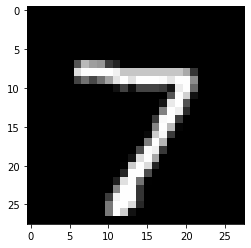

In [317]:
plt.imshow(x_test[0], cmap='gray')

In [318]:
y_test[0]

7

# Tensorboard

TensorFlow provides a utility called TensorBoard. One of TensorBoard's many capabilities is visualizing a computation graph. You can easily do this with a few simple commands.


In [319]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='.', histogram_freq=1)

In [320]:
model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0657 - accuracy: 0.9796
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0595 - accuracy: 0.9810
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0542 - accuracy: 0.9825
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0483 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0438 - accuracy: 0.9847


# Case Study

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

7. For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

10. Brief statistical analysis:

    Attribute number:    Mean:   Standard Deviation:
    1.                     3.8     3.4
    2.                   120.9    32.0
    3.                    69.1    19.4
    4.                    20.5    16.0
    5.                    79.8   115.2
    6.                    32.0     7.9
    7.                     0.5     0.3
    8.                    33.2    11.8


In [321]:
# load the dataset
import pandas as pd
dataset = pd.read_csv('pima-indians-diabetes.csv', delimiter=',', header=None)

In [322]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [323]:
dataset.shape

(768, 9)

In [324]:
# split into input (X) and output (y) variables
X = dataset.loc[:,:7]
y = dataset.loc[:,8]

In [325]:
X.head()

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [326]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: 8, dtype: int64

In [327]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [328]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
0,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
1,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
2,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
3,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
4,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
5,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
6,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
7,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [329]:
X.corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


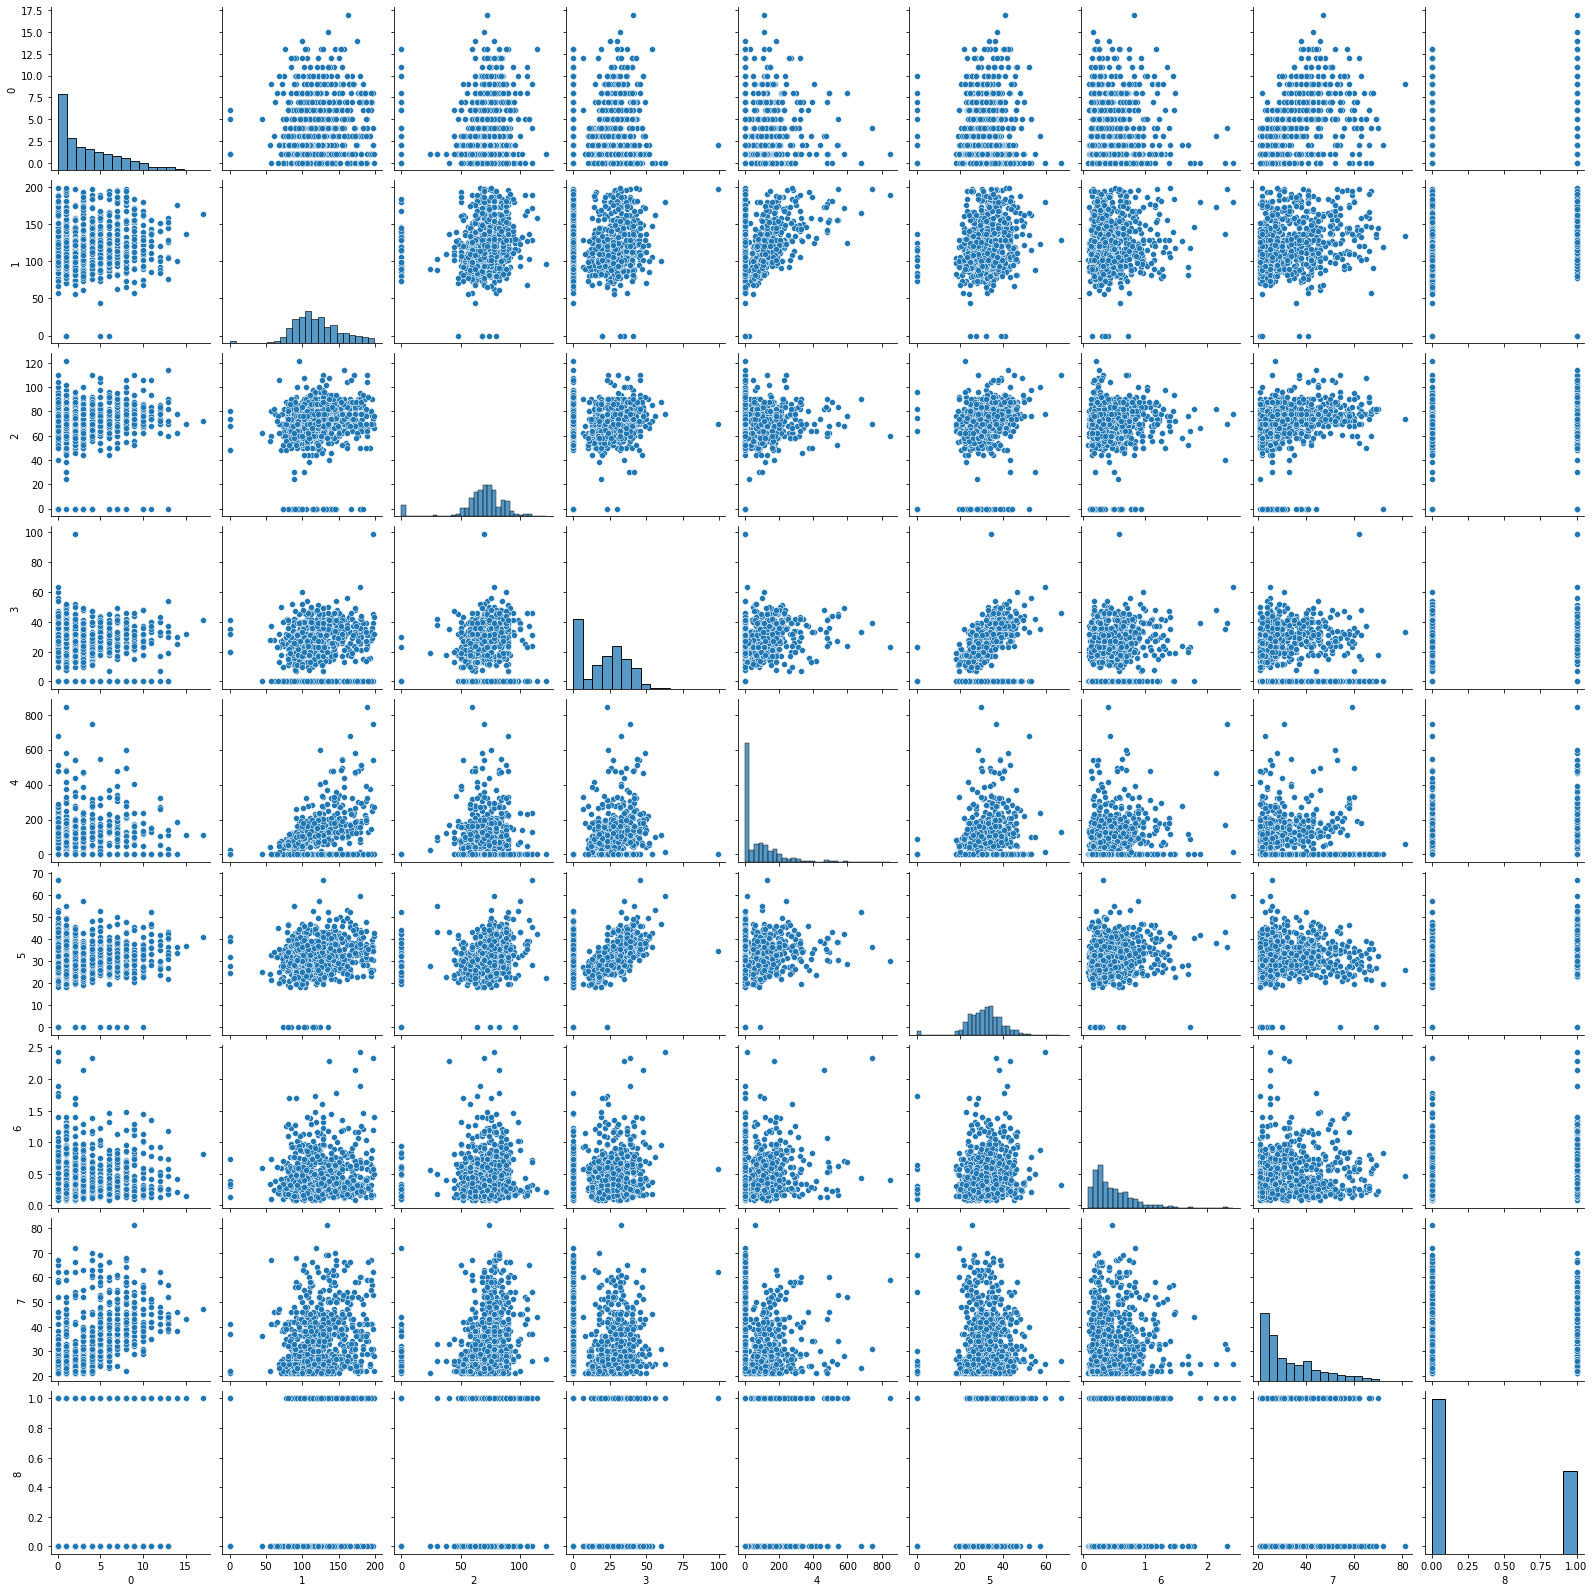

In [330]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(dataset)

In [331]:
# Splitting the dataset into the Training and Testing set

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [332]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [342]:
model = tf.keras.models.Sequential()

In [343]:
# Add Network Layers
model.add(tf.keras.layers.Dense(12, input_dim=8, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [344]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [345]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [348]:
X_train.shape

(614, 8)

In [346]:
# fit the keras model on the dataset (Train the data)
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 785us/step - loss: 4.3746 - accuracy: 0.5335
Epoch 2/150
62/62 [==============================] - 0s 732us/step - loss: 1.7681 - accuracy: 0.5740
Epoch 3/150
62/62 [==============================] - 0s 800us/step - loss: 1.0593 - accuracy: 0.5455
Epoch 4/150
62/62 [==============================] - 0s 812us/step - loss: 0.8364 - accuracy: 0.5424
Epoch 5/150
62/62 [==============================] - 0s 892us/step - loss: 0.7714 - accuracy: 0.5880
Epoch 6/150
62/62 [==============================] - 0s 914us/step - loss: 0.8183 - accuracy: 0.5611
Epoch 7/150
62/62 [==============================] - 0s 936us/step - loss: 0.7325 - accuracy: 0.6200
Epoch 8/150
62/62 [==============================] - 0s 751us/step - loss: 0.7153 - accuracy: 0.6156
Epoch 9/150
62/62 [==============================] - 0s 760us/step - loss: 0.7073 - accuracy: 0.6042
Epoch 10/150
62/62 [==============================] - 0s 763us/step - loss: 0.6963 - accura

In [349]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

20/20 [==============================] - 0s 698us/step - loss: 0.4719 - accuracy: 0.7769
Accuracy: 77.69


In [350]:
# make probability predictions with the model
predictions = model.predict(X_test)
# round predictions 
rounded = [round(x[0]) for x in predictions]

In [351]:
predictions

array([[0.91358626],
       [0.17676246],
       [0.01524857],
       [0.6308434 ],
       [0.2732592 ],
       [0.06103441],
       [0.81344247],
       [0.5810605 ],
       [0.5014317 ],
       [0.7339262 ],
       [0.6040297 ],
       [0.81216997],
       [0.33787468],
       [0.27722245],
       [0.00338027],
       [0.3303307 ],
       [0.5947002 ],
       [0.15384915],
       [0.31226456],
       [0.3098473 ],
       [0.674366  ],
       [0.2685007 ],
       [0.42887408],
       [0.00322527],
       [0.13226375],
       [0.62613153],
       [0.09806633],
       [0.63118845],
       [0.3272397 ],
       [0.3052731 ],
       [0.46593234],
       [0.2724292 ],
       [0.09963673],
       [0.7145709 ],
       [0.3719459 ],
       [0.75096583],
       [0.47479725],
       [0.05535197],
       [0.49800184],
       [0.8614481 ],
       [0.21819222],
       [0.00334901],
       [0.29666704],
       [0.8416859 ],
       [0.9755893 ],
       [0.05162069],
       [0.23890468],
       [0.361

In [352]:
rounded

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [353]:
# make class predictions with the model
predictions = (model.predict(X_test) > 0.5).astype(int)
predictions

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [354]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, predictions)
print(cm1)

[[92 15]
 [19 28]]


In [355]:
# Visualize the model
from tensorflow.keras.utils import plot_model

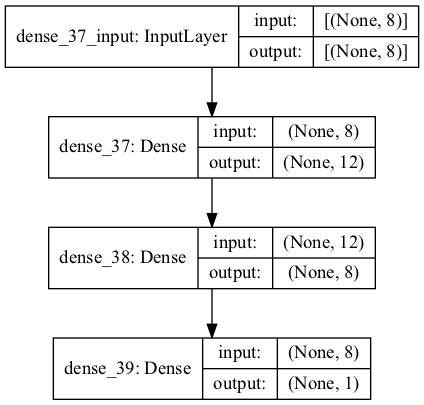

In [356]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/150
62/62 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7573
Epoch 2/150
62/62 [==============================] - 0s 983us/step - loss: 0.4951 - accuracy: 0.7590
Epoch 3/150
62/62 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7834
Epoch 4/150
62/62 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7736
Epoch 5/150
62/62 [==============================] - 0s 1ms/step - loss: 0.4858 - accuracy: 0.7704
Epoch 6/150
62/62 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.7606
Epoch 7/150
62/62 [==============================] - 0s 995us/step - loss: 0.4880 - accuracy: 0.7590
Epoch 8/150
62/62 [==============================] - 0s 972us/step - loss: 0.4991 - accuracy: 0.7704
Epoch 9/150
62/62 [==============================] - 0s 952us/step - loss: 0.4977 - accuracy: 0.7638
Epoch 10/150
62/62 [==============================] - 0s 998us/step - loss: 0.4845 - accuracy: 0.7638

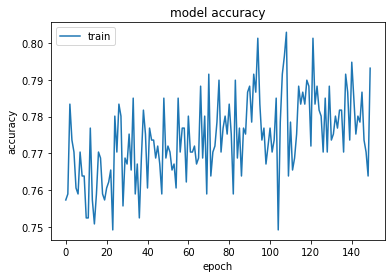

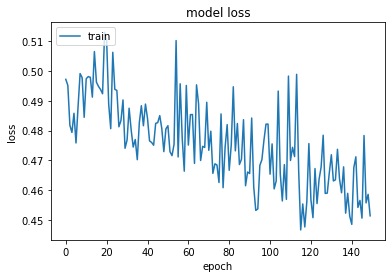

In [357]:
# Visualize Training History
history = model.fit(X_train, y_train, epochs=150, batch_size=10)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Model Optimization

Some important parameters to look out for while optimizing neural networks are:

-Type of architecture

-Number of Layers

-Number of Neurons in a layer

-Regularization parameters

-Learning Rate

-Type of optimization / backpropagation technique to use

-Dropout rate

-Weight sharing

In [358]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Epoch 1/150
62/62 [==============================] - 0s 1ms/step - loss: 0.9274 - accuracy: 0.6303
Epoch 2/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.6352
Epoch 3/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.6547
Epoch 4/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.6710
Epoch 5/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5727 - accuracy: 0.6873
Epoch 6/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.7068
Epoch 7/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5304 - accuracy: 0.7280
Epoch 8/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7410
Epoch 9/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7492
Epoch 10/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.7590
Epoch 11/

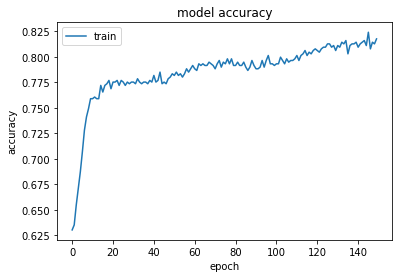

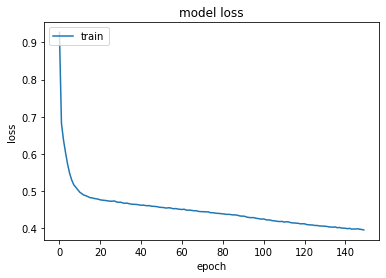

In [359]:
# Visualize Training History
history = model.fit(X_train, y_train, epochs=150, batch_size=10)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [360]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

20/20 [==============================] - 0s 1ms/step - loss: 0.3924 - accuracy: 0.8176
Accuracy: 81.76


In [361]:
predictions = (model.predict(X_test) > 0.5).astype(int)
cm1 = confusion_matrix(y_test, predictions)
print(cm1)

[[93 14]
 [20 27]]


In [362]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, input_dim=8, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [363]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/150
62/62 [==============================] - 0s 807us/step - loss: 0.6661 - accuracy: 0.6186
Epoch 2/150
62/62 [==============================] - 0s 793us/step - loss: 0.5958 - accuracy: 0.6337
Epoch 3/150
62/62 [==============================] - 0s 799us/step - loss: 0.5516 - accuracy: 0.6497
Epoch 4/150
62/62 [==============================] - 0s 778us/step - loss: 0.5221 - accuracy: 0.6903
Epoch 5/150
62/62 [==============================] - 0s 801us/step - loss: 0.5366 - accuracy: 0.7110
Epoch 6/150
62/62 [==============================] - 0s 778us/step - loss: 0.5108 - accuracy: 0.7144
Epoch 7/150
62/62 [==============================] - 0s 795us/step - loss: 0.4902 - accuracy: 0.7732
Epoch 8/150
62/62 [==============================] - 0s 841us/step - loss: 0.4940 - accuracy: 0.7619
Epoch 9/150
62/62 [==============================] - 0s 903us/step - loss: 0.4797 - accuracy: 0.7742
Epoch 10/150
62/62 [==============================] - 0s 799us/step - loss: 0.4628 - accura

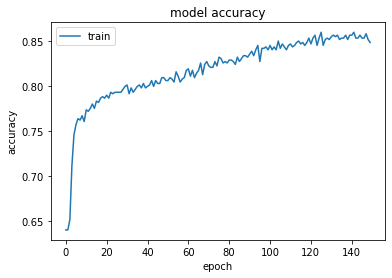

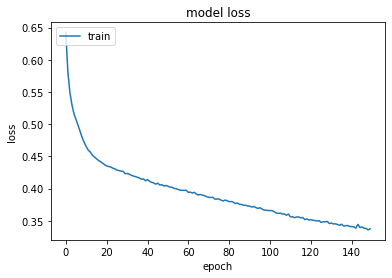

In [364]:
# Visualize Training History
history = model.fit(X_train, y_train, epochs=150, batch_size=10)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [365]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 978us/step - loss: 0.5329 - accuracy: 0.7857
Accuracy: 78.57


## Saving & Loading Models

In [366]:
import os

# Saving Model Weights only
checkpoint_path = "train/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [367]:
model.fit(X_train, y_train, epochs=150, batch_size=10, callbacks=[cp_callback])

Epoch 1/150
62/62 [==============================] - 0s 925us/step - loss: 0.3378 - accuracy: 0.8534

Epoch 00001: saving model to train/cp.ckpt
Epoch 2/150
62/62 [==============================] - 0s 924us/step - loss: 0.3354 - accuracy: 0.8518

Epoch 00002: saving model to train/cp.ckpt
Epoch 3/150
62/62 [==============================] - 0s 939us/step - loss: 0.3361 - accuracy: 0.8485

Epoch 00003: saving model to train/cp.ckpt
Epoch 4/150
62/62 [==============================] - 0s 806us/step - loss: 0.3349 - accuracy: 0.8518

Epoch 00004: saving model to train/cp.ckpt
Epoch 5/150
62/62 [==============================] - 0s 841us/step - loss: 0.3362 - accuracy: 0.8550

Epoch 00005: saving model to train/cp.ckpt
Epoch 6/150
62/62 [==============================] - 0s 935us/step - loss: 0.3369 - accuracy: 0.8534

Epoch 00006: saving model to train/cp.ckpt
Epoch 7/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8567

Epoch 00007: saving model to t

In [260]:
!ls train/

checkpoint
cp.ckpt.data-00000-of-00001
cp.ckpt.index
events.out.tfevents.1636722201.Saravanans-IBM-Macbook-Pro.local.71754.342827.v2
events.out.tfevents.1636722201.Saravanans-IBM-Macbook-Pro.local.profile-empty
my_model
plugins


In [369]:
# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(X_train, y_train, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

20/20 - 0s - loss: 0.2859 - accuracy: 0.8795
Restored model, accuracy: 87.95%


In [370]:
# Manually save the weights
model.save_weights('./train/my_checkpoint')

In [371]:
# Save the entire model
model.save('train/my_model')

INFO:tensorflow:Assets written to: train/my_model/assets


In [372]:
# Load the entire model
new_model = tf.keras.models.load_model('train/my_model')

In [373]:
new_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 5         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [374]:
# Save the Model in Hierarchical Data Format Standard
model.save("train/hdf5model.h5")

In [375]:
# Load the Model saved above
hdf5model = tf.keras.models.load_model('train/hdf5model.h5')

In [376]:
hdf5model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 5         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [377]:
## Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(X_train, y_train, epochs=150, batch_size=10, callbacks=[callback])

Epoch 1/150
62/62 [==============================] - 0s 865us/step - loss: 0.2964 - accuracy: 0.8762
Epoch 2/150
62/62 [==============================] - 0s 818us/step - loss: 0.2947 - accuracy: 0.8746
Epoch 3/150
62/62 [==============================] - 0s 839us/step - loss: 0.2961 - accuracy: 0.8713
Epoch 4/150
62/62 [==============================] - 0s 779us/step - loss: 0.2937 - accuracy: 0.8779
Epoch 5/150
62/62 [==============================] - 0s 982us/step - loss: 0.2933 - accuracy: 0.8795
Epoch 6/150
62/62 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.8779
Epoch 7/150
62/62 [==============================] - 0s 891us/step - loss: 0.2926 - accuracy: 0.8811
Epoch 8/150
62/62 [==============================] - 0s 915us/step - loss: 0.2959 - accuracy: 0.8795
Epoch 9/150
62/62 [==============================] - 0s 976us/step - loss: 0.2946 - accuracy: 0.8795
Epoch 10/150
62/62 [==============================] - 0s 923us/step - loss: 0.2925 - accuracy